In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

from utils import *
from model import ColorizationNet
from data_loader import *

In [2]:
checkpoint_path = 'checkpoints/best-model.pth'

model = ColorizationNet()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=3e-5,
                             weight_decay=1e-3)

checkpoint = torch.load(checkpoint_path, map_location=lambda storage, loc: storage)
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
best_losses = checkpoint['best_losses']
train_loss = checkpoint['train_loss']
validate_loss = checkpoint['validate_loss']

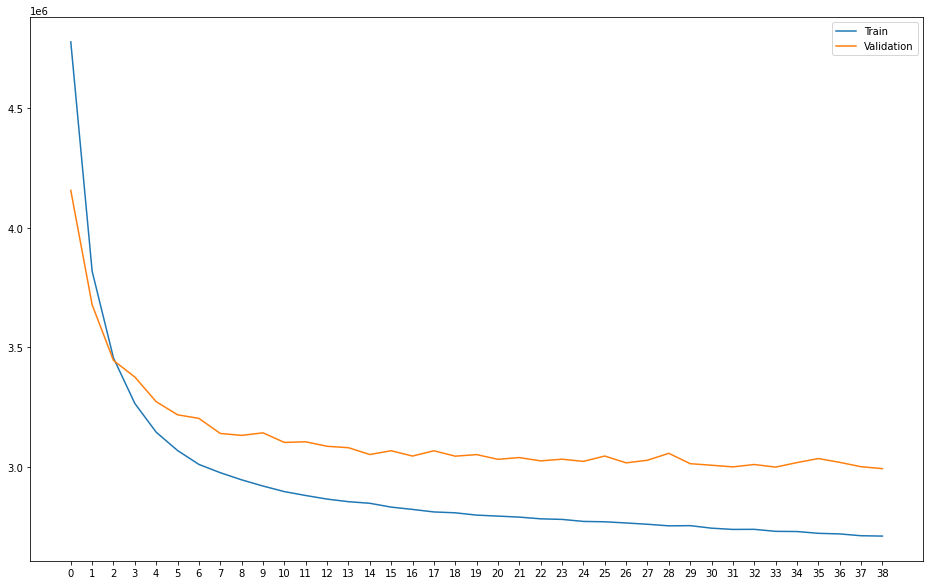

In [4]:
t_loss = train_loss.values()
v_loss = validate_loss.values()

plt.figure(figsize=(16, 10))
plt.plot(t_loss)
plt.plot(v_loss)
plt.xticks(range(len(v_loss)))
plt.legend(['Train', 'Validation'])